In [1]:
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
import numpy as np
import pandas as pd

import datetime as dt 

In [3]:
# Reflect Tables into SQLAlchemy ORM

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [4]:
# Path to sqlite

# Create an engine that can talk to the database
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
    
# Declare a Base using `automap_base()`
Base = automap_base()

# reflect the tables
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

# We can view all of the classes that automap found
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [6]:
# save references to each table

# Assign the station class to a variable called `Measurement`
Measurement = Base.classes.measurement

# # Assign the station class to a variable called "Station"
Station = Base.classes.station


In [7]:
# Create a session
session = Session(engine)

In [8]:
# Query all of Measurements table into one variable  

measurement_results = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all()
# measurement_results

In [9]:
# Query all of the Stations table into one variable.
stations_results = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).all()
#stations_results

In [10]:
## Exploratory Climate Analysis
#
#

2016-08-23


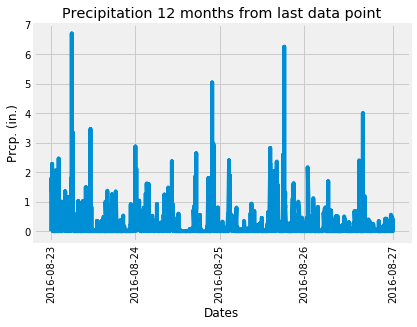

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [11]:
## Design a query to retrieve the last 12 months of precipitation data and plot the results
date = session.query(func.max(Measurement.date)).all()
year = int(date[0][0][0:4])
month = int(date[0][0][5:7])
day = int(date[0][0][8:10])

## Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(year, month, day) - dt.timedelta(days=365)
print(year_ago)

## Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago).all()

## Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Drop rows with no data
measure_df = pd.DataFrame(results, columns=['date', 'prcp']).set_index('date').dropna().sort_values(by='date')
measure_df

# Create labels for x-axis of graph
# Add all dates into a list
labels = [i[0] for i in results]
labels

## Use Pandas Plotting with Matplotlib to plot the data
x = [0, 90, 180, 270, 365]

fig1 = plt.figure()
plt.plot(measure_df)
plt.title('Precipitation 12 months from last data point')
plt.xlabel('Dates')
plt.ylabel('Prcp. (in.)')
plt.xticks(x, labels, rotation='vertical')

plt.show()

# Summary statistics for measurements
measure_df.describe()


In [12]:
# Design a query to show how many stations are available in this dataset?
count_stations = session.query(func.count(Station.name)).all()
count_stations = count_stations[0][0]
print(f"There are {count_stations} total weather stations")

There are 9 total weather stations


In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_count = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(f"Station : {station_count[0][0]} was the most active with {station_count[0][1]} reported measurements")
station_count

Station : USC00519281 was the most active with 2772 reported measurements


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station
most_active = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs), func.count(Measurement.tobs))\
    .filter(Measurement.station == station_count[0][0]).all()
most_active
nl = '\n'
print(f"Station : {most_active[0][0]}{nl}\
Low temp. : {most_active[0][1]}{nl}\
High temp. : {most_active[0][2]}{nl}\
Avg. temp. : {most_active[0][3]}{nl}\
Reported Measurements : {most_active[0][4]}{nl}\
")
most_active

Station : USC00519281
Low temp. : 54.0
High temp. : 85.0
Avg. temp. : 71.66378066378067
Reported Measurements : 2772



[('USC00519281', 54.0, 85.0, 71.66378066378067, 2772)]

In [15]:
# Most active station name variable
most_active_name = {most_active[0][0]}
# most_active_name = str(most_active_name)
most_active_name

# Add the station with the most reports to a list to use later
most_reports = []
for active in most_active_name:
#     print(active)
    most_reports.append(active)

most_reports = most_reports[0]
most_reports

'USC00519281'

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

## Design a query to retrieve the last 12 months of precipitation data and plot the results
date = session.query(func.max(Measurement.date)).all()
year = int(date[0][0][0:4])
month = int(date[0][0][5:7])
day = int(date[0][0][8:10])

## Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(year, month, day) - dt.timedelta(days=365)
print(year_ago)

## Perform a query to retrieve the data and precipitation scores
tobs_results = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
filter(Measurement.date >= year_ago).filter(Measurement.station == most_reports).all()
#tobs_results


2016-08-23


In [17]:
# Convert 'tobs' results to pandas df for graphing
tobs_df = pd.DataFrame(tobs_results)
tobs_df

# pull 'tobs' into a series for graphing
new_tobs = tobs_df['tobs']
#new_tobs

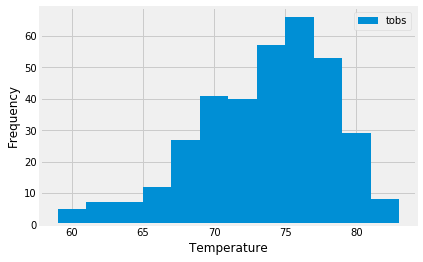

In [18]:
# Plot 'tobs' results into a histogram

# Add legend label
legend_label = ['tobs']

# Plot histogram
fig2 = plt.figure()
plt.hist(new_tobs, bins=12)
plt.legend(legend_label, loc=0)
plt.xlabel('Temperature')
plt.ylabel("Frequency")



plt.show()